# –ü—Ä–∏—Å—Ç—É–ø–∞—è –∫ —Ä–∞–±–æ—Ç–µ

### –ü—É—Ç—å –∫ –¥–∞–Ω–Ω—ã–º

In [1]:
TRAIN_DATASET_PATH = 'data/course_project_train.csv'
TEST_DATASET_PATH = 'data/course_project_test.csv'

### –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency
import catboost as catb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [3]:
df = pd.read_csv(TRAIN_DATASET_PATH)
test = pd.read_csv(TEST_DATASET_PATH)

# EDA
–†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [4]:
# –ö–æ–ø–∏—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–ª—è —ç–∫—Å–ø–µ—Ä–∏–º–µ—Ç–æ–≤
eda_df = df.copy()

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤

### –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏

In [5]:
def features_with_missing_values(df):
    # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
    observations_count = df.shape[0]
    
    # –ù–∞–π–¥–µ–º –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
    cols_with_missing = [ col for col in df.columns if df[col].count() < observations_count ]
    
    # –í–µ—Ä–Ω–µ–º –∏—Ö
    return cols_with_missing

# –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ–Ω–æ–º –∏ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ
print(features_with_missing_values(df))
print(features_with_missing_values(test))

['Annual Income', 'Years in current job', 'Months since last delinquent', 'Bankruptcies', 'Credit Score']
['Annual Income', 'Years in current job', 'Months since last delinquent', 'Bankruptcies', 'Credit Score']


–ö–∞–∫ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–º–µ—é—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –∏ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ

–û—Ç–º–µ—Ç–∏–º –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –Ω–æ–≤—ã—Ö –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

In [6]:
for col in features_with_missing_values(eda_df):
    eda_df[col + '_was_missing'] = eda_df[col].isnull()

### –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

<AxesSubplot:>

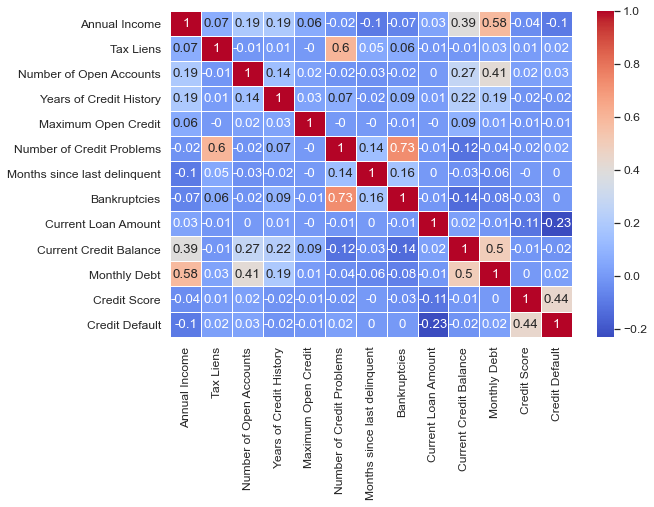

In [7]:
df_corr = np.round(df.corr(), 2)

plt.figure(figsize = (9,6))
sns.set(font_scale=1.1)
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap='coolwarm')

–¢–∞–∫ –∫–∞–∫ Annual Income –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å Monthly Debt, –µ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–∂–Ω–æ –∑–∞–ø–æ–ª–Ω–∏—Ç—å —á–µ—Ä–µ–∑ Montly Debt. –¢–æ –∂–µ —Å–∞–º–æ–µ –∫–∞—Å–∞–µ—Ç—Å—è Bankruptcies –∏ Number of Credit Problems. –î–ª—è —ç—Ç–æ–≥–æ –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å X —á–µ—Ä–µ–∑ Y

In [8]:
def imput_by_correlating(df, target, correlating):
    # –°–æ–∑–¥–∞–¥–∏–º DataFrame c –∫–æ—Ä–µ–ª–ª–∏—Ä—É—é—â–µ–º –∏ —Ü–µ–ª–µ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º
    corr_df = pd.DataFrame({
        correlating: df[correlating],
        target: df[target]
    })
    
    # –£–¥–∞–ª–∏–º –Ω–∞–±–ª—é–¥–µ–Ω–∏—è —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏
    corr_df.dropna(inplace=True)
    
    # –ü–æ–¥–µ–ª–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –Ω–∞ —Ç–æ—Ç, —á—Ç–æ —Å –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º –æ—Ç–≤–µ—Ç–æ–º –∏ –±–µ–∑
    X = corr_df.drop(columns=target)
    y = corr_df[target]
    
    # –°–æ–∑–¥–∞–¥–∏–º –∏ –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å
    lr = LinearRegression()
    lr.fit(X, y)
    
    # –ü—Ä–µ–¥—Å–∫–∞–∂–µ–º –≤–µ—Å—å —Å—Ç–æ–ª–¥–µ—Ü —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
    predicted_target = lr.predict(
        pd.DataFrame({ correlating: df[correlating]})
    )
    
    # –ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏
    df[target].fillna(pd.Series(predicted_target), inplace=True)

In [9]:
imput_by_correlating(eda_df, "Annual Income", "Monthly Debt")
imput_by_correlating(eda_df, "Bankruptcies", "Number of Credit Problems")

### –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ —Ä–µ–π—Ç–∏–Ω–≥–∞

<AxesSubplot:xlabel='Credit Default', ylabel='Credit Score'>

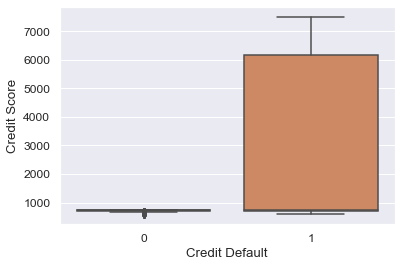

In [10]:
# plt.hist(df["Credit Score"], bins=30)
# plt.scatter(df["Credit Score"], df["Credit Default"])
# plt.show()
sns.boxplot(x=df["Credit Default"], y=df["Credit Score"])

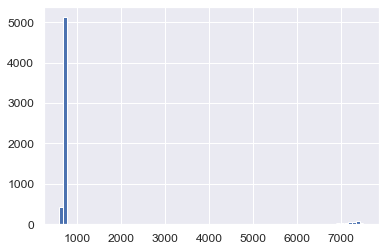

In [11]:
_ = plt.hist(df["Credit Score"], bins="sqrt")

–í—ã—á–∏—Å–ª–∏–º –º–µ–¥–∏–∞–Ω—ã Credit Score –¥–ª—è –æ–±–æ–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π Credit Default

In [12]:
credit_default_median = eda_df.groupby(["Credit Default"])["Credit Score"].agg("median")
credit_default_median

Credit Default
0    732.0
1    730.5
Name: Credit Score, dtype: float64

–ö–∞–∫ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, –æ–±–µ –º–µ–¥–∏–∞–Ω—ã –æ—á–µ–Ω—å –±–ª–∏–∑–∫–∏ –∏ –Ω–µ —É—Ö–æ–¥—è—Ç –≤ —á–µ—Ç—ã—Ä–µ—Ö –∑–Ω–∞—á–Ω—ã–µ —á–∏—Å–ª–∞. –û—á–µ–≤–∏–¥–Ω–æ, –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã. –ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ —ç—Ç–æ –Ω–µ –≤—ã–±—Ä–æ—Å—ã, –∞ –±–æ–ª—å—à–∏–µ –¥–æ–ª–∂–Ω–∏–∫–∏, –ø–æ—ç—Ç–æ–º—É –∏—Ö –º—ã —É–±–∏—Ä–∞—Ç—å –Ω–µ –±—É–¥–µ–º. –î–∞–≤–∞–π—Ç–µ –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ Credit Score —ç—Ç–∏–º–∏ –º–µ–¥–∏–∞–Ω–∞–º–∏

In [13]:
eda_df["Credit Score"].fillna(eda_df["Credit Default"].map(credit_default_median), inplace=True)

### –ó–∞–ø–æ–ª–Ω—è–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ

#### Years in current job

In [14]:
eda_df["Years in current job"].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

–ë—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç, –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç. –ó–∞–ø–æ–ª–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º '< 1 year'

In [15]:
eda_df["Years in current job"].fillna("< 1 year", inplace=True)

#### Months since last delinquent

–¢—É—Ç —è –Ω–∏–∫–∞–∫–æ–π –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏ –Ω–µ –Ω–∞—à–µ–ª. –ó–∞–ø–æ–ª–Ω—é –º–µ–¥–∏–∞–Ω–æ–π

In [16]:
eda_df["Months since last delinquent"].fillna( \
    eda_df["Months since last delinquent"].median(), inplace=True)

–£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –±–æ–ª—å—à–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç

In [17]:
features_with_missing_values(eda_df)

[]

## –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –≥–∏–ø–æ—Ç–∏–∑—ã

#### –ò–∑ –≤—Å–µ—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–∞–∫–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ?
–í—ã–≤–µ–¥–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [18]:
quantitative_dtypes = [ 'float64', 'float32', 'float16' ]
quantitative_features = [ col for col in eda_df.columns if eda_df[col].dtype in quantitative_dtypes]
quantitative_features

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞

In [19]:
def check_shapiro(df):
    for feature in quantitative_features:
        stat, p = shapiro(df[feature])
        alpha = 0.05
        if p > alpha:
            print(f"‚úÖ {feature} –ø–æ—Ö–æ–∂–µ, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = {p}")
        else:
            print(f"‚ùå {feature} —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = {p}")

In [20]:
check_shapiro(eda_df)

‚ùå Annual Income —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Tax Liens —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Number of Open Accounts —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Years of Credit History —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Maximum Open Credit —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Number of Credit Problems —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Months since last delinquent —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Bankruptcies —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Current Loan Amount —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Current Credit Balance —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Monthly Debt —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Credit Score —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0


c:\users\blaze\scoop\apps\python\3.9.1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


–ü–æ–ø—Ä–æ–±—É–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å —ç—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –µ—â–µ —Ä–∞–∑ –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å

In [21]:
eda_log_df = eda_df.copy()

for feature in quantitative_features:
    eda_log_df[feature] = np.log1p(eda_log_df[feature])

check_shapiro(eda_log_df)

‚ùå Annual Income —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 3.375227564666221e-18
‚ùå Tax Liens —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Number of Open Accounts —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 3.89771478979336e-20
‚ùå Years of Credit History —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 7.846205107853166e-07
‚ùå Maximum Open Credit —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Number of Credit Problems —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Months since last delinquent —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Bankruptcies —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Current Loan Amount —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Current Credit Balance —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Monthly Debt —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.0
‚ùå Credit Score —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ. p = 0.

–ù–∏ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω –Ω–æ—Ä–º–∞–ª—å–Ω–æ. –ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏.
#### –ï—Å—Ç—å –ª–∏ –æ—Ç–ª–∏—á–∏—è –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ train –∏ test?
–î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –æ—Ç–ª–∏—á–∏—è –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ train –∏ test –∏—Å–ø–æ–ª—å–∑—É—è –∫—Ä–∏—Ç–µ—Ä–∏–π U-–ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏

In [22]:
def check_mannwhitneyu(df_a, df_b):
    for feature in quantitative_features:
        stat, p = mannwhitneyu(df_a[feature].dropna(), df_b[feature].dropna(), alternative='two-sided')
        alpha = 0.05
        if p > alpha:
            print(f"‚úÖ {feature} –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = {p}")
        else:
            print(f"‚ùå {feature} –Ω–µ —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = {p}")

In [23]:
check_mannwhitneyu(eda_df, test)

‚úÖ Annual Income –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = 0.0993412119415356
‚úÖ Tax Liens –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = 0.1967372056760731
‚úÖ Number of Open Accounts –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = 0.4428527435772891
‚úÖ Years of Credit History –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = 0.7773891904970164
‚úÖ Maximum Open Credit –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = 0.7664441986829786
‚úÖ Number of Credit Problems –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = 0.28391545104752514
‚ùå Months since last delinquent –Ω–µ —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = 0.026812927132806655
‚úÖ Bankruptcies –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = 0.05619958034738773
‚úÖ Current Loan Amount –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—é. p = 0.24634871937364144
‚úÖ Current Credit Balance –ø–æ—Ö–æ–∂–µ, —Ä–∞–≤–µ–Ω –ø–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω

#### –°—Ä–∞–≤–Ω–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
–ò—Å–ø–æ–ª—å–∑—É–µ–º –∫—Ä–∏—Ç–µ—Ä–∏–π U-–ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏

- –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã (–Ω–µ—Ç –≤–ª—è–Ω–∏—è –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é)
- –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –µ—Å—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —ç—Ç–∏–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –æ–Ω —Ü–µ–Ω–µ–Ω –¥–ª—è –º–æ–¥–µ–ª–∏

In [24]:
# p_values = pd.Series(dtype='float64')
for feature in quantitative_features:
    cd_0 = eda_df.loc[(eda_df["Credit Default"] == 0), feature]
    cd_1 = eda_df.loc[(eda_df["Credit Default"] == 1), feature]
    stat, p = mannwhitneyu(cd_0, cd_1)
    alpha = 0.05
    if p > alpha:
        print(f"‚ùå {feature} –Ω–∞–∏–º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å")
    else:
        print(f"‚úÖ {feature} –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Å—Ç–∞–≤–∏—Ç—å")
        # p_values[feature] = p

‚úÖ Annual Income –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Å—Ç–∞–≤–∏—Ç—å
‚úÖ Tax Liens –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Å—Ç–∞–≤–∏—Ç—å
‚úÖ Number of Open Accounts –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Å—Ç–∞–≤–∏—Ç—å
‚úÖ Years of Credit History –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Å—Ç–∞–≤–∏—Ç—å
‚úÖ Maximum Open Credit –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Å—Ç–∞–≤–∏—Ç—å
‚ùå Number of Credit Problems –Ω–∞–∏–º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å
‚ùå Months since last delinquent –Ω–∞–∏–º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å
‚ùå Bankruptcies –Ω–∞–∏–º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å
‚úÖ Current Loan Amount –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Å—Ç–∞–≤–∏—Ç—å
‚ùå Current Credit Balance –Ω–∞–∏–º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å
‚úÖ Monthly Debt –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Å—Ç–∞–≤–∏—Ç—å
‚úÖ Credit Score –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Å—Ç–∞–≤–∏—Ç—å


–û—Ç –Ω–∞–∏–º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–π –¥–∞–≤–∞–π—Ç–µ –∫–∞–∫ —Ä–∞–∑ –∏ –∏–∑–±–∞–≤–∏–º—Å—è

In [25]:
weak_features = [
    "Number of Credit Problems",
    "Months since last delinquent",
    "Bankruptcies",
    "Current Credit Balance"
]

try:
    eda_df.drop(columns=weak_features, inplace=True)
except KeyError:
    pass

quantitative_features = [ f for f in quantitative_features if f not in weak_features ]

#### –°—Ä–∞–≤–Ω–∏–º –ø–æ–ø–∞—Ä–Ω–æ –¥–æ–ª–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ Home Ownership

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

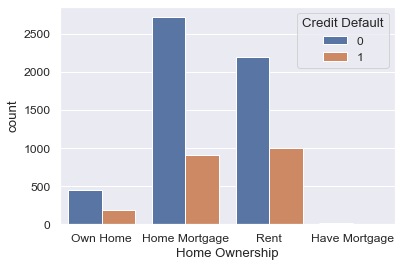

In [26]:
sns.countplot(x="Home Ownership", hue="Credit Default", data=eda_df)

–í—ã–≤–µ–¥–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ Home Ownership –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [27]:
home_ownership_cd_0 = eda_df.loc[(eda_df["Credit Default"] == 0), "Home Ownership"].value_counts()
home_ownership_cd_1 = eda_df.loc[(eda_df["Credit Default"] == 1), "Home Ownership"].value_counts()
home_ownership_aspect = pd.Series(dtype='float64')

for cat in home_ownership_cd_0.index:
    aspect = (home_ownership_cd_1[cat] / home_ownership_cd_0[cat]) * 100
    home_ownership_aspect[cat] = aspect
    print(f"{cat} {aspect}%")

print()

similar_shares = {}

for cat_a in home_ownership_aspect.index:
    for cat_b in home_ownership_aspect.index:
        if(cat_a == cat_b):
            continue
            
        # –£–±–µ—Ä–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã
        try:
            if(similar_shares[cat_a] == cat_b):
                continue
        except KeyError:
            pass
        try:
            if(similar_shares[cat_b] == cat_a):
                    continue
        except KeyError:
            pass
        
        # –ü–æ–¥–µ–ª–∏–º —á–∏—Å–ª–∞. –ï—Å–ª–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–µ–ª–µ–Ω–∏—è –±–ª–∏–∑–æ–∫ –∫ 1, —Ç–æ –¥–æ–ª–∏ —Å—Ö–æ–∂–∏
        div = abs(home_ownership_aspect[cat_a] / home_ownership_aspect[cat_b])
        if(abs(1 - div) < 0.2):
            similar_shares[cat_a] = cat_b

for cat in similar_shares:
    print(f"–î–æ–ª–∏ {cat} —Å—Ö–æ–∂–∏ —Å {similar_shares[cat]}")

Home Mortgage 33.6640940830577%
Rent 45.57019536574284%
Own Home 42.1978021978022%
Have Mortgage 20.0%

–î–æ–ª–∏ Rent —Å—Ö–æ–∂–∏ —Å Own Home


**–ù–∞–±–ª—é–¥–µ–Ω–∏–µ**

–ö–∞–∫ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, Rent –∏ Own Home –Ω–∞ –ø–µ—Ä–≤—ã–π –≤–∑–≥–ª—è–¥, –∏–º–µ—é—Ç —Å—Ö–æ–∂–∏–µ –¥–æ–ª–∏ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ï—Å–ª–∏ —ç—Ç–æ —Ç–∞–∫, —ç—Ç–∏ –¥–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –≤ –æ–¥–Ω—É

**–ì–∏–ø–æ—Ç–µ–∑–∞**
- –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –¥–≤–µ —á–∞—Å—Ç–æ—Ç—ã –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
- –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ —á–∞—Å—Ç–æ—Ç–∞—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã
- –ö—Ä–∏—Ç–µ—Ä–∏–π: –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞
- –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏  ùõº = 0.05 
- –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–π –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –Ω–∞ –æ–±–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –î–ª—è —ç—Ç–æ–≥–æ —Å–æ—Å—Ç–∞–≤–∏–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É. –í –∫–∞—á–µ—Å—Ç–≤–µ —Å–ø–∏—Å–∫–∞ –∑–Ω–∞—á–µ–Ω–∏–π –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª—é–±–æ–π –ø—Ä–∏–∑–Ω–∞–∫, —è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª Tax Liens

In [28]:
home_ownership_target = df.loc[df['Home Ownership'].isin(['Rent', 'Own Home']),
                               ['Tax Liens', 'Home Ownership', 'Credit Default']]
home_ownership_target_pivot = home_ownership_target.pivot_table(
    index='Home Ownership',
    values='Tax Liens',
    columns='Credit Default',
    aggfunc='count')
home_ownership_target_pivot

Credit Default     0     1
Home Ownership            
Own Home         455   192
Rent            2201  1003

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞—à—É –≥–∏–ø–æ—Ç–µ–∑—É

In [29]:
chi2, p, dof, expected = chi2_contingency(home_ownership_target_pivot, correction=False)
print(p)
print(p > 0.05)

0.41388761719718237
True


P-value –ø–æ–ª—É—á–∏–ª–æ—Å—å –±–æ–ª—å—à–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –¥–ª—è –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏—è –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –∏ –º–æ–∂–Ω–æ –¥–æ–ø—É—Å—Ç–∏—Ç—å, —á—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ Own Home –∏ Rent –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –∏—Ö –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –≤ –æ–¥–Ω—É –∫–∞—Ç–µ–≥–æ—Ä–∏—é. –î–∞–≤–∞–π—Ç–µ —Ç–∞–∫ –∏ —Å–¥–µ–ª–∞–µ–º

In [30]:
eda_df.loc[eda_df['Home Ownership'] == 'Own Home', 'Home Ownership'] = 'Rent or Own Home'
eda_df.loc[eda_df['Home Ownership'] == 'Rent', 'Home Ownership'] = 'Rent or Own Home'
eda_df['Home Ownership'].unique()

array(['Rent or Own Home', 'Home Mortgage', 'Have Mortgage'], dtype=object)

#### –°—Ä–∞–≤–Ω–∏–º –¥–æ–ª–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ Term

–ù–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ Term –¥–ª—è –º–æ–¥–µ–ª–∏? –ò—Å–ø–æ–ª—å–∑—É–µ–º –∫—Ä–∏—Ç–µ—Ä–∏–π –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞. –°–æ–∑–¥–∞–¥–∏–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É, –∫–∞–∫ –¥–µ–ª–∞–ª–∏ —ç—Ç–æ –≤—ã—à–µ

In [31]:
term_target_pivot = eda_df.pivot_table(
    index='Term',
    # –í values –º–æ–∂–Ω–æ –ª—é–±–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –ø–æ–¥—Å—Ç–∞–≤–∏—Ç—å
    values='Tax Liens',
    columns='Credit Default',
    aggfunc='count')
term_target_pivot

Credit Default     0     1
Term                      
Long Term       1128   816
Short Term      4259  1297

–ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É
- –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –ø—Ä–∏–∑–Ω–∞–∫ Term –Ω–µ –≤–ª—è–µ—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
- –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: Term —è–≤–ª—è–µ—Ç—Å—è —Å–∏–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º

In [32]:
chi2, p, dof, expected = chi2_contingency(term_target_pivot, correction=False)
print(p)
print(p > 0.05)

1.1519373940439208e-55
False


P-value –ø–æ–ª—É—á–∏–ª–æ—Å—å –º–µ–Ω—å—à–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —É –Ω–∞—Å –µ—Å—Ç—å –æ—Å–Ω–æ–≤–∞–Ω–∏—è –¥–ª—è –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏—è –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –∏ –º–æ–∂–Ω–æ –¥–æ–ø—É—Å—Ç–∏—Ç—å, —á—Ç–æ Term —è–≤–ª—è–µ—Ç—Å—è —Å–∏–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –¥–ª—è –º–æ–¥–µ–ª–∏

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤

In [33]:
eda_df.describe()

Annual Income    Tax Liens  Number of Open Accounts  \
count   7.500000e+03  7500.000000              7500.000000   
mean    1.367881e+06     0.030133                11.130933   
std     7.865447e+05     0.271604                 4.908924   
min     1.645970e+05     0.000000                 2.000000   
25%     8.767305e+05     0.000000                 8.000000   
50%     1.211216e+06     0.000000                10.000000   
75%     1.630654e+06     0.000000                14.000000   
max     1.014934e+07     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  Current Loan Amount  \
count              7500.000000         7.500000e+03         7.500000e+03   
mean                 18.317467         9.451537e+05         1.187318e+07   
std                   7.041946         1.602622e+07         3.192612e+07   
min                   4.000000         0.000000e+00         1.124200e+04   
25%                  13.500000         2.792295e+05         1.801690e+05   
50%                  17.000000         4.781590e+05         3.095730e+05   
75%                  21.800000         7.935015e+05         5.198820e+05   
max                  57.700000         1.304726e+09         1.000000e+08   

        Monthly Debt  Credit Score  Credit Default  
count    7500.000000   7500.000000     7500.000000  
mean    18314.454133   1063.979133        0.281733  
std     11926.764673   1438.312319        0.449874  
min         0.000000    585.000000        0.000000  
25%     10067.500000    718.000000        0.000000  
50%     16076.500000    732.000000        0.000000  
75%     23818.000000    740.000000        1.000000  
max    136679.000000   7510.000000        1.000000

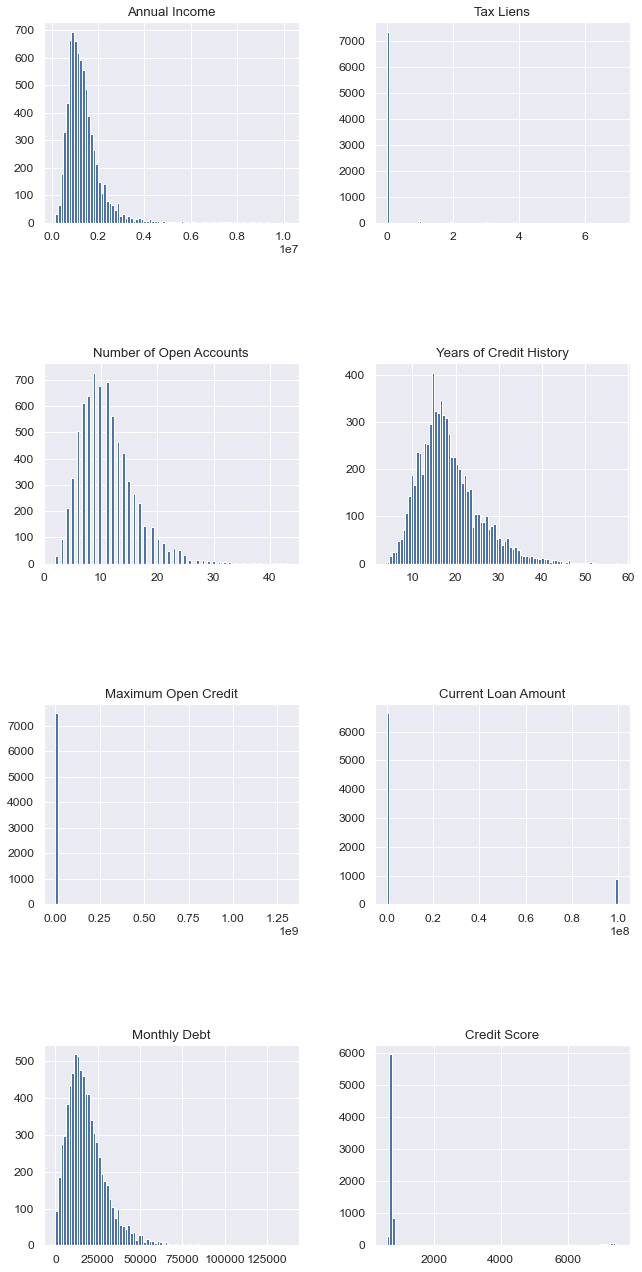

In [34]:
fig, ax = plt.subplots(nrows=4, ncols=2)

fig.set_size_inches(10.5, 22.5)
fig.subplots_adjust(wspace=0.3, hspace=0.7)

def feature_hist_to_ax(feature, row, col):
    ax[row][col].set_title(feature)
    ax[row][col].hist(eda_df[feature], bins="sqrt")

feature_hist_to_ax("Annual Income", 0, 0)
feature_hist_to_ax("Tax Liens", 0, 1)
feature_hist_to_ax("Number of Open Accounts", 1, 0)
feature_hist_to_ax("Years of Credit History", 1, 1)
feature_hist_to_ax("Maximum Open Credit", 2, 0)
feature_hist_to_ax("Current Loan Amount", 2, 1)
feature_hist_to_ax("Monthly Debt", 3, 0)
feature_hist_to_ax("Credit Score", 3, 1)

#### Credit Score

In [35]:
eda_df['Credit Score_outlier'] = 0
eda_df.loc[(eda_df['Credit Score'] > 1000), 'Credit Score_outlier'] = 1

## –ù–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

#### Net Debt

–ß–∏—Å—Ç—ã–π –¥–æ–ª–≥. –ü—Ä–∏–∑–Ω–∞–∫ Current Credit Balance —É–¥–∞–ª–µ–Ω

#### Loan repayment period from income

–ü–µ—Ä–∏–æ–¥ –≤—ã–ø–ª–∞—Ç—ã –∫—Ä–µ–¥–∏—Ç–∞ –∏–∑ –¥–æ—Ö–æ–¥–∞

In [ ]:
eda_df["Loan repayment period from income"] = eda_df["Current Loan Amount"] - eda_df["Annual Income"]

### –°—Ç—Ä–æ–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

–í—ã–≤–µ–¥–µ–º –≤—Å–µ —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

In [37]:
print([ col for col in eda_df.columns if eda_df[col].dtype == 'O' ])

['Home Ownership', 'Years in current job', 'Purpose', 'Term']


–ú–æ–¥–µ–ª–∏ —Ä–∞–±–æ—Ç–∞—é—Ç —Ç–æ–ª—å–∫–æ —Å —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏. –ü–µ—Ä–µ–≤–µ–¥–µ–º –∏—Ö –≤ —á–∏—Å–ª–∞

#### Home Ownership

In [38]:
eda_df["Home Ownership"].unique()

array(['Rent or Own Home', 'Home Mortgage', 'Have Mortgage'], dtype=object)

–≠—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ —á–∏—Å–ª–æ–≤–æ–π, –∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π. –õ—É—á—à–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è —ç—Ç–æ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –µ–≥–æ –≤ –¥–∞–º–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏

In [39]:
home_ownership_dummies = pd.get_dummies(eda_df["Home Ownership"], prefix="Home Ownership")
eda_df = pd.concat([eda_df, home_ownership_dummies], axis=1)

#### Years in current job

In [40]:
eda_df["Years in current job"].unique()

array(['< 1 year', '10+ years', '8 years', '6 years', '7 years',
       '5 years', '1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

–≠—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π. –î–∞–≤–∞–π—Ç–µ –ø–µ—Ä–µ–≤–µ–¥–µ–º –µ–≥–æ –≤ —á–∏—Å–ª–∞, –∑–∞–æ–¥–Ω–æ —É–∫–∞–∂–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Ç–∏–ø

In [41]:
eda_df["Years in current job"] = eda_df["Years in current job"].map({
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0
    }).astype(np.int8)

#### Purpose

In [42]:
eda_df["Purpose"].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

–≠—Ç–æ —Ç–æ–∂–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫. –ó–∞–º–µ–Ω–∏–º –µ–≥–æ –Ω–∞ –¥–∞–º–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

In [43]:
purpose_dummies = pd.get_dummies(eda_df["Purpose"], prefix="Purpose")
eda_df = pd.concat([eda_df, purpose_dummies], axis=1)

#### Term

In [44]:
eda_df["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

–≠—Ç–æ –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫. –ï–≥–æ –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ —á–∏—Å–ª–∞

In [45]:
eda_df["Is Long Term"] = eda_df["Term"].map({
        'Short Term': 0,
        'Long Term': 1
    }).astype(np.int8)

## –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ú—ã –¥–æ–±–∞–≤–∏–ª–∏ –∫ —Å—Ç—Ä–æ–∫–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –∏—Ö —á–∏—Å–ª–æ–≤—ã–µ —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç—ã, –Ω–æ —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤—Å–µ –µ—â–µ –æ—Å—Ç–∞–ª–∏—Å—å. –î–∞–≤–∞–π—Ç–µ –∏—Ö —É–±–µ—Ä–µ–º

In [46]:
str_features = [ col for col in eda_df.columns if eda_df[col].dtype == 'O' ]
eda_df.drop(columns=str_features, inplace=True)

## –û–±—É—á–µ–Ω–∏–µ

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞, –ø–æ—Å–º–æ—Ç–∏–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ—Ç–±—Ä–æ—Å–∏–º —Å–∞–º—ã–µ –Ω–µ–≤–∞–∂–Ω—ã–µ

In [47]:
# –ü—Ä–∏–∑–Ω–∞–∫–∏
eda_X = eda_df.drop("Credit Default", axis=1)

# –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
eda_y = eda_df["Credit Default"]

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É
eda_X_train, eda_X_valid, eda_y_train, eda_y_valid = \
    train_test_split(eda_X, eda_y, test_size=0.3, random_state=42)

# –û–±—É—á–µ–Ω–∏–µ

eda_model = GradientBoostingClassifier(criterion='mse',
                                  max_depth=3,
                                  min_samples_leaf=100,
                                  random_state=42,
                                  n_estimators=1050)
eda_model.fit(eda_X_train, eda_y_train)

GradientBoostingClassifier(criterion='mse', min_samples_leaf=100,
                           n_estimators=1050, random_state=42)

### –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

In [48]:
eda_train_pred = eda_model.predict(eda_X_train)
eda_valid_pred = eda_model.predict(eda_X_valid)

In [49]:
def check_precision_recall(y, pred):
    # –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫
    conf_matrix = confusion_matrix(y, pred)

    TP = conf_matrix[1][1]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")


def check_metrics(y_train, train_pred, y_valid, valid_pred):
    print("-- –¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ -- ")
    print(f"F1: {f1_score(y_train, train_pred)}")
    check_precision_recall(y_train, train_pred)
    print("\n-- –í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ -- ")
    print(f"F1: {f1_score(y_valid, valid_pred)}")
    check_precision_recall(y_valid, valid_pred)

In [50]:
check_metrics(eda_y_train, eda_train_pred, eda_y_valid, eda_valid_pred)

-- –¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ -- 
F1: 0.8648233486943164
Precision: 0.979982593559617
Recall: 0.7738831615120275

-- –í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ -- 
F1: 0.6449864498644986
Precision: 0.7951002227171492
Recall: 0.5425531914893617


### –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [51]:
feature_importances = pd.DataFrame(zip(eda_X_train.columns, eda_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
8                               Credit Score    0.387930
14                      Credit Score_outlier    0.157062
13                  Credit Score_was_missing    0.094699
6                        Current Loan Amount    0.082651
9                  Annual Income_was_missing    0.045971
7                               Monthly Debt    0.042065
15         Loan repayment period from income    0.041262
5                        Maximum Open Credit    0.036442
0                              Annual Income    0.032315
4                    Years of Credit History    0.029323
3                    Number of Open Accounts    0.014683
34                              Is Long Term    0.013390
1                       Years in current job    0.009571
10          Years in current job_was_missing    0.003915
11  Months since last delinquent_was_missing    0.003802
18           Home Ownership_Rent or Own Home    0.002147
22                Purpose_debt consolidation    0.000902
17              Home Ownership_Home Mortgage    0.000778
28                             Purpose_other    0.000663
24                 Purpose_home improvements    0.000428
27                            Purpose_moving    0.000000
33                           Purpose_wedding    0.000000
32                          Purpose_vacation    0.000000
31                       Purpose_take a trip    0.000000
30                    Purpose_small business    0.000000
29                  Purpose_renewable energy    0.000000
12                  Bankruptcies_was_missing    0.000000
26                     Purpose_medical bills    0.000000
25                    Purpose_major purchase    0.000000
21                         Purpose_buy house    0.000000
20                         Purpose_buy a car    0.000000
19                     Purpose_business loan    0.000000
16              Home Ownership_Have Mortgage    0.000000
2                                  Tax Liens    0.000000
23              Purpose_educational expenses    0.000000

–û—Ç–±—Ä–æ—Å–∏–º –Ω–µ–Ω—É–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. –î–∞–º–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ–∫–∞ –æ—Å—Ç–∞–≤–∏–º

In [52]:
unnecessary_features = [
    'Tax Liens',
    'Bankruptcies_was_missing'
]
eda_df.drop(columns=unnecessary_features, inplace=True)

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

CorrelationImputer

In [55]:
class CorrelationImputer:
    
    def __init__(self):
        self.lr = LinearRegression()
        self.correlating = None
        self.target = None
        
    def fit(self, df, target, correlating):
        # –ó–∞–ø–æ–º–Ω–∏–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
        self.correlating = correlating
        self.target = target
        
        # –°–æ–∑–¥–∞–¥–∏–º DataFrame c –∫–æ—Ä–µ–ª–ª–∏—Ä—É—é—â–µ–º –∏ —Ü–µ–ª–µ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º
        corr_df = pd.DataFrame({
            correlating: df[correlating],
            target: df[target]
        })

        # –£–¥–∞–ª–∏–º –Ω–∞–±–ª—é–¥–µ–Ω–∏—è —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏
        corr_df.dropna(inplace=True)

        # –ü–æ–¥–µ–ª–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –Ω–∞ —Ç–æ—Ç, —á—Ç–æ —Å –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º –æ—Ç–≤–µ—Ç–æ–º –∏ –±–µ–∑
        X = corr_df.drop(columns=target)
        y = corr_df[target]
    
        # –û–±—É—á–∏–º –º–æ–¥–µ–ª—å
        self.lr.fit(X, y)
    
    def transform(self, df):
        # –ü—Ä–µ–¥—Å–∫–∞–∂–µ–º –≤–µ—Å—å —Å—Ç–æ–ª–¥–µ—Ü —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
        predicted_target = self.lr.predict(
            pd.DataFrame({ self.correlating: df[self.correlating]})
        )

        # –ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏
        new_df = df.copy()
        new_df[self.target].fillna(pd.Series(predicted_target), inplace=True)
        return new_df

DataPipeline

In [56]:
class DataPipeline:
    """–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö"""
    
    def __init__(self):
        """–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∫–ª–∞—Å—Å–∞"""
        
        self.annual_income_imputer = CorrelationImputer()
        self.recovered_credit_score = None
        
        self.unnecessary_features = [
            'Tax Liens',
            'Bankruptcies_was_missing'
        ]
        
        self.weak_features = [
            "Number of Credit Problems",
            "Months since last delinquent",
            "Bankruptcies",
            "Current Credit Balance"
        ]
        
        self.str_features = [
            "Term"
        ]
        
        self.categorial_features = [
            'Home Ownership',
            'Purpose'
        ]
        
    def fit(self, X, y):
        """–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫"""
        
        self.annual_income_imputer.fit(X, "Annual Income", "Monthly Debt")
        
        df_with_credit_default = X.copy()
        df_with_credit_default["Credit Default"] = y
        
        credit_score_median = df_with_credit_default \
            .groupby(["Credit Default"])["Credit Score"].agg("median")
        
        self.recovered_credit_score = df["Credit Default"].map(credit_score_median);
        
    def transform(self, df):
        """–¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö"""
        
        # –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
        
        for col in features_with_missing_values(df):
            df[col + '_was_missing'] = df[col].isnull()
            
        df = self.annual_income_imputer.transform(df)
        
        df["Credit Score"].fillna(self.recovered_credit_score, inplace=True)
        
        df["Years in current job"].fillna("< 1 year", inplace=True)
        
        # –í—ã–±—Ä–æ—Å—ã
        
        df['Credit Score_outlier'] = 0
        df.loc[(df['Credit Score'] > 1000), 'Credit Score_outlier'] = 1
        
        # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        
        df["Loan repayment period from income"] = df["Current Loan Amount"] - df["Annual Income"]
        
        df.loc[df['Home Ownership'] == 'Own Home', 'Home Ownership'] = 'Rent or Own Home'
        df.loc[df['Home Ownership'] == 'Rent', 'Home Ownership'] = 'Rent or Own Home'
        
        df["Years in current job"] = df["Years in current job"].map({
            '10+ years': 10,
            '9 years': 9,
            '8 years': 8,
            '7 years': 7,
            '6 years': 6,
            '5 years': 5,
            '4 years': 4,
            '3 years': 3,
            '2 years': 2,
            '1 year': 1,
            '< 1 year': 0
        }).astype(np.int8)
        
        df["Is Long Term"] = df["Term"].map({
            'Short Term': 0,
            'Long Term': 1
        }).astype(np.int8)
        
        # –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        
        df.drop(columns=self.str_features, inplace=True)
        df.drop(columns=self.weak_features, inplace=True)
        df.drop(columns=self.unnecessary_features, inplace=True)
        
        # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è Catboost
        
        for feature in self.categorial_features:
            df[feature] = pd.Categorical(df[feature])
        
        return df

In [57]:
# –ü—Ä–∏–∑–Ω–∞–∫–∏
X = df.drop("Credit Default", axis=1)

# –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
y = eda_df["Credit Default"]

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
pipe = DataPipeline()
pipe.fit(X_train, y_train)
X_train = pipe.transform(X_train)
X_valid = pipe.transform(X_valid)

<ipython-input-56-f0d61c1b0803>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_was_missing'] = df[col].isnull()
<ipython-input-56-f0d61c1b0803>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_was_missing'] = df[col].isnull()


# –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏

–ü–æ–¥–±–æ—Ä –ø–æ —Å–µ—Ç–∫–µ –¥–ª–∏—Ç—Å—è –æ—á–µ–Ω—å –¥–æ–ª–≥–æ. –Ø –∑–∞–∫–æ–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–ª –∫–æ–¥, —á—Ç–æ–±—ã —Ç–µ—Ç—Ä–∞–¥–∫–∞ –±—ã—Å—Ç—Ä–µ–µ –æ—Ç—Ä–∞–±–∞—Ç—ã–≤–∞–ª–∞

In [ ]:
params = {
    'learning_rate': [0.05, 0.1, 0.5],
    'depth':[4, 6, 8]
}
model_hp = catb.CatBoostClassifier(n_estimators=1000,
                                     custom_loss=['F1'],
                                     silent=True,
                                     random_state=21)

# train_pool = catb.Pool(data=X_train, label=y_train, cat_features=pipe.categorial_features)
#
#grid_search_results = model_hp.grid_search(params, train_pool, cv=5, stratified=True,
#                                             verbose=False, plot=False)
#
#grid_search_results['params']

# {'depth': 6, 'learning_rate': 0.1}

# –û–±—É—á–µ–Ω–∏–µ

–í —ç—Ç–æ—Ç —Ä–∞–∑ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å CatBoost. –Ø —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –Ω–µ —Å—Ç–∞–ª –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –¥–∞–º–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ Catboost –∏—Ö –Ω–µ –ª—é–±–∏—Ç. –í–º–µ—Å—Ç–æ —ç—Ç–æ–≥–æ –º—ã —Å–∫–æ—Ä–º–∏–º –µ–º—É —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ–Ω —Å–∞–º —Ä–∞–∑–±–µ—Ä–µ—Ç—Å—è —Å –Ω–∏–º–∏

In [ ]:
model = catb.CatBoostClassifier(
    learning_rate=0.1,
    depth=3,
    n_estimators=1000,
    silent=True, random_state=21, cat_features=pipe.categorial_features)
model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ

In [ ]:
train_pred = model.predict(X_train)
valid_pred = model.predict(X_valid)

### –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ

In [ ]:
check_metrics(y_train, train_pred, y_valid, valid_pred)

ROC –∫—Ä–∏–≤–∞—è

In [ ]:
fpr, tpr, _ = roc_curve(y_valid, valid_pred)
plt.plot(fpr,tpr)

## –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–µ

–ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ

In [ ]:
test_ids = [ i for i in range(test.shape[0]) ]
test_copy = test.copy()
test_copy = pipe.transform(test_copy)

–ü—Ä–µ–¥—Å–∫–∞–∂–µ–º –∏ —Å–æ—Ö—Ä–∞–Ω–∏–º –≤ —Ñ–∞–π–ª

In [ ]:
test_pred = model.predict(test_copy)
test_pred_output = pd.DataFrame({"Id": test_ids, "Credit Default": test_pred})
test_pred_output.to_csv("DmitryKozichev_predictions.csv", index=False)